In [1]:
import os
import scipy.io as io 
import control as ctrl 
import matplotlib.pyplot as plt 
import numpy as np 
import cmath
import math


In [2]:
#read frequency respose data from .mat file 
data = io.loadmat('platform_resp.mat')
#print(data.keys())
MagR = data["MagR"]
Freq = data["Freq"]

In [4]:
Phase = np.angle(MagR)
Mag = 20*np.log10(np.abs(MagR))
Freq = Freq/(2*np.pi)

x220322b1490>,
 ...]

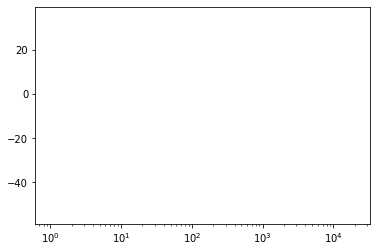

In [5]:
plt.semilogx(Freq,Mag)